In [1]:
import torch
from transformers import AutoModelForImageClassification, AutoFeatureExtractor, AutoConfig
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
extractor = AutoFeatureExtractor.from_pretrained("trpakov/vit-face-expression")
model = AutoModelForImageClassification.from_pretrained("trpakov/vit-face-expression").to('cpu')
config = AutoConfig.from_pretrained("trpakov/vit-face-expression")

id2label = {i: 'others' if label in ['fear', 'surprise', 'disgust'] else label for i, label in config.id2label.items()}

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [4]:
def analyze_emotions_in_image(image_path):
    image = Image.open(image_path).convert('RGB')
    inputs = extractor(images=image, return_tensors="pt").to('cpu')
    
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    probabilities = probabilities.detach().cpu().numpy()[0]
    class_probabilities = {id2label[i]: prob for i, prob in enumerate(probabilities)}
    
    display_probabilities(image, class_probabilities)

def display_probabilities(image, class_probabilities):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=list(class_probabilities.values()), y=list(class_probabilities.keys()))
    plt.xlabel('Probability')
    plt.tight_layout()
    plt.show()

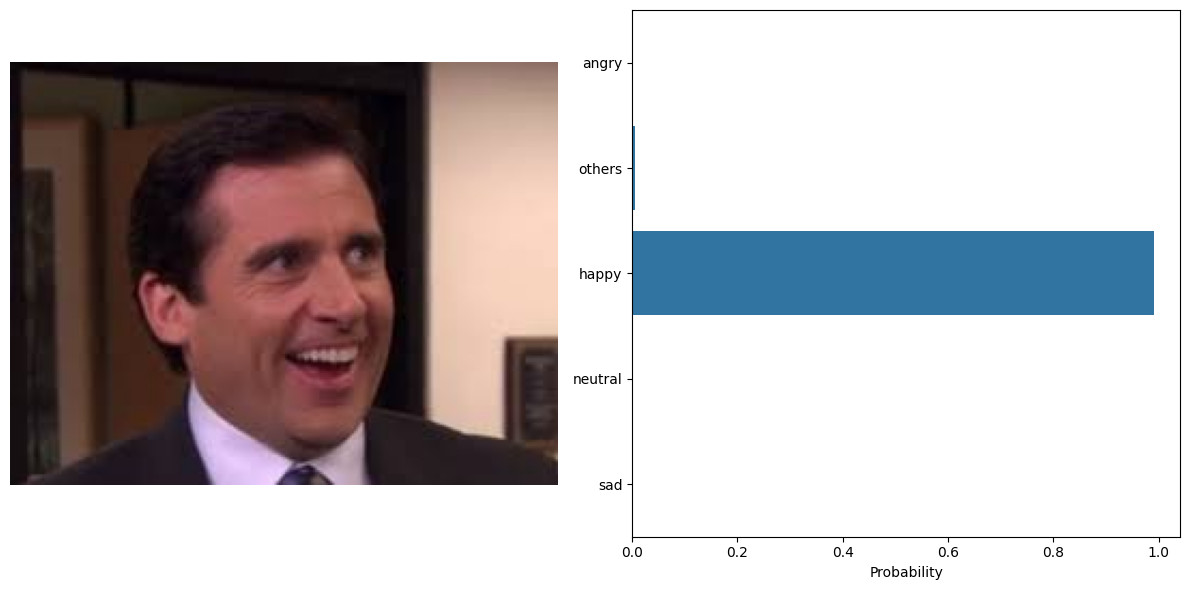

In [5]:
analyze_emotions_in_image('images.jpg')